# Numerical approximation of FBSDEs

Consider following FBSDE:

The forward part:
$$
\left\{\begin{array} {l} {{d X_{t}=\mu( t, X_{t} ) d t+\sigma( t, X_{t} ) d W_{t}, \quad t \in[ 0, T ]}} \\ {{X_{0}=x,}} \\ \end{array} \right.  
$$
and backward part:
$$
\left\{\begin{array} {l} {{{-d Y_{t}=f \left( t, X_{t}, Y_{t}, Z_{t} \right) d t-Z_{t} d W_{t}, \quad t \in[ 0, T ]}}} \\ {{{Y_{T}=\Phi( X_{T} ),}}} \\ \end{array} \right. 
$$

which have under certain conditions of the functions has an unique solution $(X,Y,Z)$.

## Euler scheme 

We time discretize uniformly with time step $\Delta_{i}^{N}$ 
 the forward SDE using an Euler scheme:

$$
\left\{\begin{array} {l} {{X_{0}^{N}=X_{0}}} \\ {{X_{t_{i}}^{N}=X_{t_{i-1}}^{N}+\mu \left( t_{i-1}, X_{t_{i-1}}^{N} \right) \Delta_{i}^{N}+\sigma\left(t_{i-1}, X_{t_{i-1}}^{N} \right) \Delta W_{i}^{N}.}} \\ \end{array} \right. 
$$


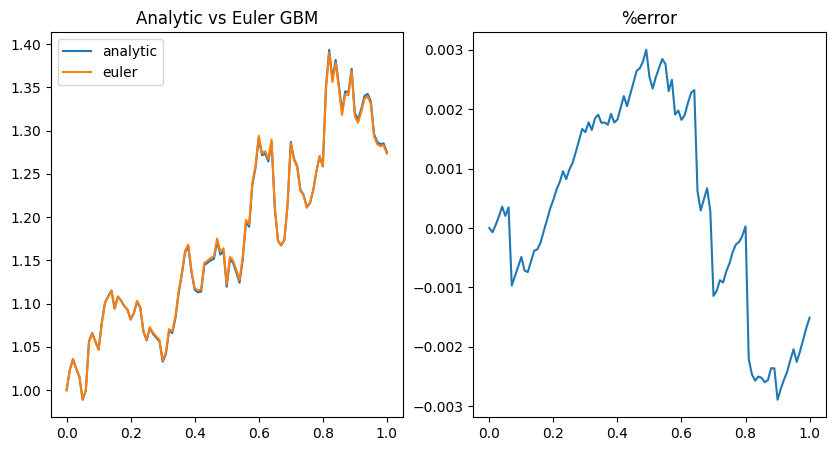

In [48]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_GBM_path(S0, mu, sigma, T, dt, num_paths):
    """Simulate multiple paths of the geometric Brownian motion process S_{t}=S_{0} exp((r-sigma^2/2)t + sigma*W_{t})"""
    N = round(T/dt)
    t = np.linspace(0, T, N+1)
    W = np.random.standard_normal(size = (num_paths, N)) 
    W = np.insert(W, 0, 0, axis=1)
    W = np.cumsum(W, axis=1)*np.sqrt(dt) ### standard brownian motion
    X = (mu - 0.5*sigma**2)*t + sigma*W 
    S = S0*np.exp(X) ### geometric brownian motion
    return S

def euler_maruyama(X0, mu, sigma, T, N, num_paths):
    dt = T/N
    t = np.linspace(0, T, N+1)
    X = np.zeros((num_paths, N+1))
    X[:, 0] = X0
    for j in range(num_paths):
        for i in range(1, N+1):
            X[j, i] = X[j, i-1] + mu(t[i-1], X[j, i-1]) * dt + sigma(t[i-1],X[j, i-1]) * np.random.normal(0,np.sqrt(dt))
    return t, X

def muGBM(mu): return lambda t, X: mu*X
def sigmaGBM(sigma): return lambda t,X: sigma*X

mu = 0.07
sigma = 0.2
X0 = 1
T = 1 
N = 100
seed = np.random.randint(0,100000)
np.random.seed(seed)
realization_euler_gbm = euler_maruyama(X0, muGBM(mu), sigmaGBM(sigma), T, N,1)

np.random.seed(seed)
paths = simulate_GBM_path(X0, mu, sigma, T, T/N, 1)

fig, axs = plt.subplots(1,2,figsize=(10,5))

# First subplot
axs[0].plot(np.linspace(0,T,N+1), paths[0, :], label="analytic")
axs[0].plot(realization_euler_gbm[0], realization_euler_gbm[1][0,:], label="euler")
axs[0].legend()
axs[0].set_title('Analytic vs Euler GBM')

# Second subplot
axs[1].plot(realization_euler_gbm[0], (realization_euler_gbm[1][0,:]-paths[0,:])/(paths[0,:]+np.finfo(float).eps), label="euler")
axs[1].set_title('%error')

plt.show()